In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from keras.layers import Dropout

In [9]:
# Import data
train_data = pd.read_csv('digit-recognizer/train.csv')
test_data = pd.read_csv('digit-recognizer/test.csv')

# Explore data
print(train_data.head())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [10]:
# Encode Labels
labels = train_data['label']
labels = to_categorical(labels, num_classes=10)

# Normalize and reshape data
pixels = train_data.drop(['label'], axis=1)
pixels = pixels / 255.0
pixels = pixels.values.reshape(-1, 28, 28, 1)

# Split training data into training and validation set
X_train, X_val, y_train, y_val = train_test_split(pixels, labels, test_size=0.2, random_state=42)

In [11]:
# Create CNN model
model = Sequential()

model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
1050/1050 [==============================] - 28s 26ms/step - loss: 0.4050 - accuracy: 0.8700 - val_loss: 0.0712 - val_accuracy: 0.9788
Epoch 2/10
1050/1050 [==============================] - 25s 24ms/step - loss: 0.1191 - accuracy: 0.9664 - val_loss: 0.0592 - val_accuracy: 0.9833
Epoch 3/10
1050/1050 [==============================] - 25s 24ms/step - loss: 0.0903 - accuracy: 0.9751 - val_loss: 0.0417 - val_accuracy: 0.9874
Epoch 4/10
1050/1050 [==============================] - 27s 25ms/step - loss: 0.0767 - accuracy: 0.9791 - val_loss: 0.0401 - val_accuracy: 0.9881
Epoch 5/10
1050/1050 [==============================] - 25s 23ms/step - loss: 0.0682 - accuracy: 0.9814 - val_loss: 0.0328 - val_accuracy: 0.9898
Epoch 6/10
1050/1050 [==============================] - 27s 26ms/step - loss: 0.0600 - accuracy: 0.9824 - val_loss: 0.0323 - val_accuracy: 0.9902
Epoch 7/10
1050/1050 [==============================] - 25s 24ms/step - loss: 0.0532 - accuracy: 0.9857 - val_loss: 0.0371 -

263/263 [==============================] - 2s 6ms/step


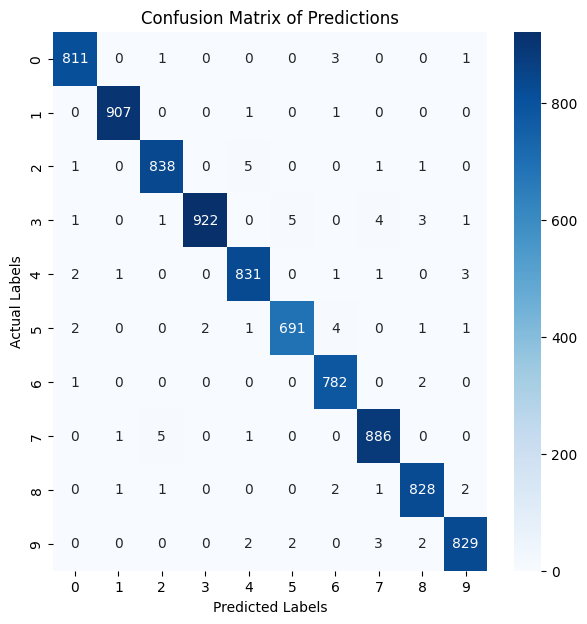

In [12]:
pred = model.predict(X_val)

# Prediction outcomes on training data
y_val_labels = np.argmax(y_val, axis=1)
pred_labels = np.argmax(pred, axis=1)

# Create confusion matrix and heatmap to visualize predictions
cm = confusion_matrix(y_val_labels, pred_labels, labels=range(10))
plt.figure(figsize=(7, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix of Predictions')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()

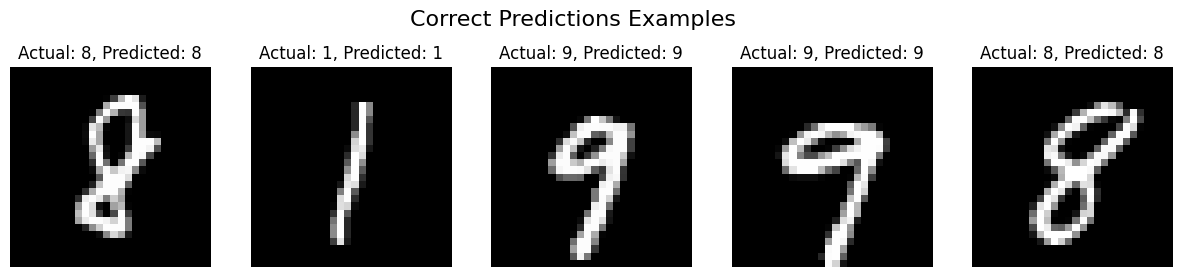

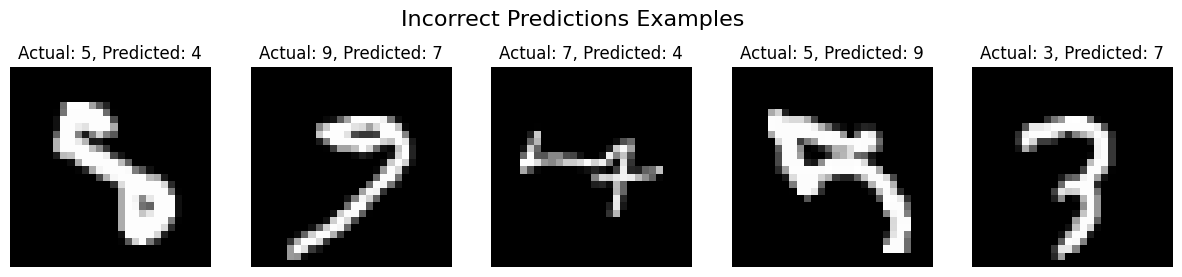

In [13]:
# Correct Predictions
fig, ax = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    ax[i].imshow(X_val[i].reshape(28, 28), cmap='gray')
    ax[i].set_title(f'Actual: {np.argmax(y_val[i])}, Predicted: {np.argmax(pred[i])}')
    ax[i].axis('off')
plt.suptitle("Correct Predictions Examples", fontsize=16, y=1.02)
plt.show()

# Incorrect Predictions
incorrect_pred = np.argmax(pred, axis=1) != np.argmax(y_val, axis=1)
fig, ax = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    index = np.where(incorrect_pred)[0][i]
    ax[i].imshow(X_val[index].reshape(28, 28), cmap='gray')
    ax[i].set_title(f'Actual: {np.argmax(y_val[index])}, Predicted: {np.argmax(pred[index])}')
    ax[i].axis('off')
    
plt.suptitle("Incorrect Predictions Examples", fontsize=16, y=1.02)
plt.show()

In [14]:
# Normalize and reshape data
test_data = test_data / 255.0
test_data = test_data.values.reshape(-1, 28, 28, 1)

# Make predictions and convert to labels
test_pred = model.predict(test_data)
test_labels = np.argmax(test_pred, axis=1)

# Make submission
submission = pd.DataFrame({'ImageId': range(1, len(test_labels) + 1), 'Label': test_labels})
submission.to_csv('Result.csv', index=False)

875/875 [==============================] - 5s 6ms/step
